# 05_Modules_Overview

## 1. What is a Module in NestJS?

* A **module** is the **fundamental building block** of a NestJS application.
* It **encapsulates related features** such as:

  * Controllers
  * Services
  * Providers
  * Other related classes/components
* Modules help with:

  * **Code organization**
  * **Reusability**
  * **Testability**
* NestJS uses **Dependency Injection (DI)** inside modules to provide them with the required dependencies.

  * This promotes **loose coupling** and makes the application easier to test.

---

## 2. What do we use a Module for?

We use modules to:

* **Break down the application** into smaller, self-contained units.
* Make the codebase **easier to manage and understand**.
* Group together everything related to a specific feature.
* Manage:

  * Services
  * Controllers
  * Other classes
* **Import and export modules** within other modules:

  * This allows **one module to use the functionality of another**.
  * Example: Authentication module can be used inside another feature module.

Think of a module as a **package of specific functionality**.

### Example functional modules

* **Users module**:

  * Handles user-related operations:

    * Create user
    * Get user details
    * Update user details
    * Delete user
* **Authentication module**:

  * Handles login and signup
  * Contains all logic related to user authentication

In this way, each specific functionality has its **own module**.

---

## 3. Modules as Entry Points for Features

* When you create a module for a specific functionality (e.g., `UserModule`):

  * That module becomes the **entry point** for that feature.
  * All requests and logic related to that feature are grouped under that module.

Each module usually has **some associated files**.
The two most important files are:

1. **Controller file**
2. **Service file**

We’ll also see test files and entity/schema files.

---

## 4. Naming Conventions for Module-Related Files

NestJS follows helpful **naming conventions** (not strictly required, but strongly recommended):

### 4.1 Module File

* Example for a user module:

  * `user.module.ts`

### 4.2 Controller File

* Should end with `.controller.ts`.
* Example:

  * `user.controller.ts`
* Tells the developer that this file is a **controller file**.

### 4.3 Service File

* Should end with `.service.ts`.
* Example:

  * `user.service.ts`
* Indicates that this is a **service file** containing business logic.

### 4.4 Entity / Model File

* Should contain `entity` in the name when using ORMs like TypeORM.
* Example:

  * `user.entity.ts`
* Represents a **database model/entity**.

### 4.5 Test File (Spec File)

* For controllers and services, test files usually end with `.spec.ts`.
* Example:

  * `user.controller.spec.ts`
* Contains **test logic** for the controller or service.

These conventions help quickly understand **what each file is for**.

---

## 5. Key Files in a Module

A module may have many associated files, but four commonly used types are:

1. **Controller file**
2. **Service file**
3. **Entity or Schema file**
4. **Test file (spec file)**

### 5.1 Controller File

* Responsible for **handling all incoming HTTP requests** for that module’s functionality.
* It:

  * Receives the request (e.g., GET `/users`, POST `/users`).
  * Decides which method should handle that request.
  * Calls the service methods to execute the actual business logic.
* Example:

  * A controller method to handle `GET /users` to return a list of all users.

### 5.2 Service File

* Contains the **business logic** of the module.
* Responsibilities:

  * Data access (e.g., querying the database)
  * Calculations and processing
  * Core functionality
* Controllers call service methods instead of implementing all logic themselves.
* This separation keeps controllers **thin and focused on request/response**, and services **focused on logic**.

### 5.3 Entity / Schema File

* **Entity file**:

  * Defines the structure of database entities when using ORMs like **TypeORM**.
  * Example: `user.entity.ts` for a User table/model.
  * Represents models like `User`, `Product`, etc.
* **Schema file**:

  * Used when working with **MongoDB via Mongoose**.
  * We define a schema in a file like `user.schema.ts` based on which MongoDB collections are created.
* Whether we use an entity or schema depends on the **database and library**.

### 5.4 Test File (`*.spec.ts`)

* Contains **unit tests** for controllers or services.
* Ensures that the controller and module behave as expected.
* Example: `app.controller.spec.ts` tests the logic inside `AppController`.

> Note: Test files are important but can be **omitted temporarily** if you’re focusing on learning the basics first.

---

## 6. The Default App Module

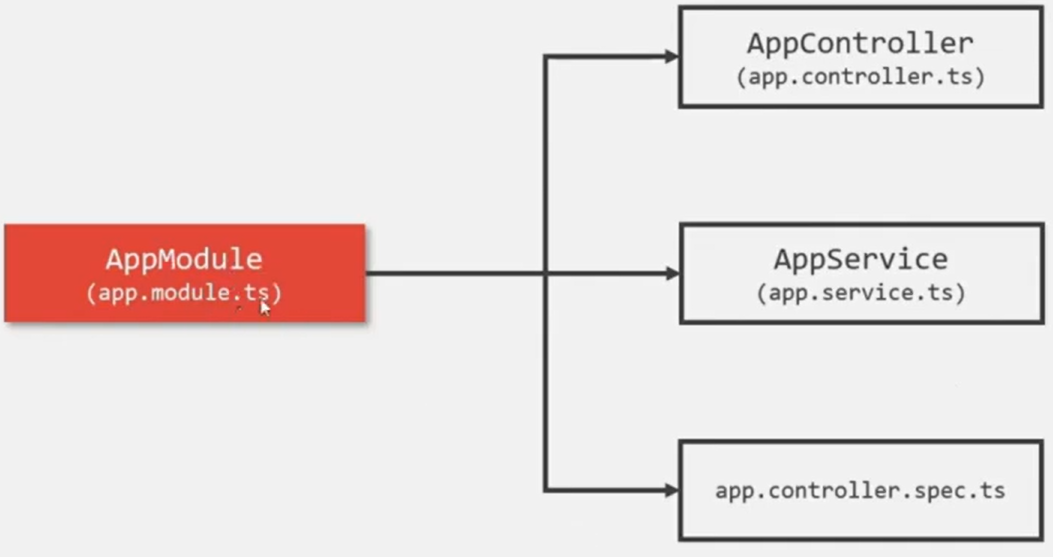

When we create a new NestJS project using the **Nest CLI**:

* NestJS automatically creates one default module:

  * **`AppModule`** → the **main/root module** of the NestJS application.

`AppModule`:

* Is the **main module** used to **connect to other modules**.
* Every other module we create should be **connected to `AppModule`**.
* Because:

  * NestJS application **initially only knows about `AppModule`**.
  * Any new user-defined module must be connected to it so the app can see and use it.

By default, `AppModule` has these associated files:

* `app.controller.ts` → contains `AppController`.
* `app.service.ts` → contains `AppService`.
* `app.controller.spec.ts` → contains test logic for `AppController`.

Remember:

* **`AppModule` is the main/root module** of a NestJS app.
* NestJS is aware of your application through this module.

---

## 7. User-Defined Modules

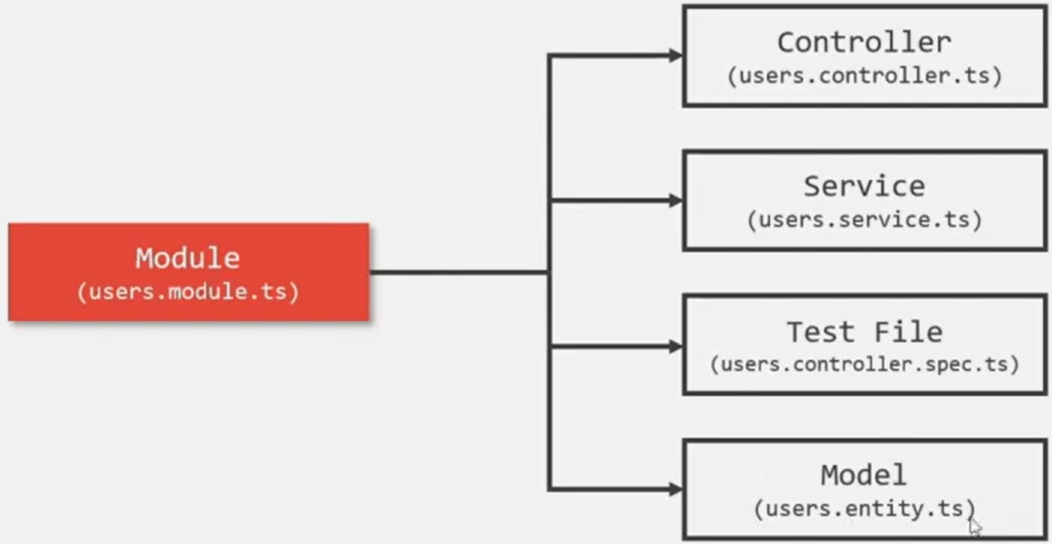


When we define our own module (user-defined module):

### 7.1 Steps to Create a Module

1. **Create a new module file** (e.g., `user.module.ts`).
2. Inside that file, create a **TypeScript class**.
3. Decorate the class with the `@Module()` decorator.

   * Any class with `@Module()` becomes a **module class**.
4. Define metadata inside `@Module({ ... })`:

   * `controllers: [...]`
   * `providers: [...]`
   * `imports: [...]`
   * `exports: [...]` (if needed)

### 7.2 Importing the User-Defined Module

* After creating a new module (e.g., `UserModule`), we **must import it into the main module** so NestJS knows about it.
* Main module is usually `AppModule`.

Example:

* `app.module.ts` will import and list `UserModule` in its `imports` array.
* This connects the new module to the NestJS application.

If we **don’t import** the new module into `AppModule`:

* NestJS will **not be aware** of that module.
* Its controllers and services won’t be usable by the app.

---

## 8. How Modules Connect in the Application

When the NestJS application runs:

1. `main.ts` is the entry point.
2. `main.ts` **bootstraps the root module** (usually `AppModule`).
3. `AppModule` imports other modules (user-defined modules):

   * Example: `UserModule`, `TweetModule`.
4. Because they are imported into `AppModule`:

   * The NestJS application becomes aware of:

     * `UserModule`
     * `TweetModule`
     * Their controllers and services.

We can also **connect user-defined modules to each other**.

### Example: User & Tweet Modules

* Suppose we have:

  * `UserModule`
  * `TweetModule`
* Every tweet is associated with a user.
* We might want to **use `UserModule` inside `TweetModule`** so that:

  * When we display a tweet, we can also fetch/display the user who posted it.
* This is possible by **importing one module into another** and using **exports/imports** between modules.

(Details of inter-module communication will be covered later in practical lectures.)

---

## 9. Summary – High-Level View of Modules

In this lecture, we understood:

* **What is a module?**

  * A logical grouping of related controllers, services, and other components.
  * Fundamental building block of a NestJS app.

* **Why do we use modules?**

  * To organize the application into smaller, manageable, self-contained units.
  * To promote reuse, loose coupling, and testability.

* **Key associated files of a module:**

  * Controller file → handles incoming HTTP requests.
  * Service file → contains business logic.
  * Entity/Schema file → defines data models or schemas for the database.
  * Test (spec) file → contains unit tests.

* **AppModule:**

  * The main/root module created by Nest CLI.
  * Connects and knows about all other modules.

* **User-defined modules:**

  * Created as separate modules for different features (e.g., users, authentication, tweets).
  * Must be imported into `AppModule` so NestJS can use them.
  * Can also import each other to share functionality.

This gives a **theoretical overview** of modules in NestJS. In the next steps, you would typically:

* Create a user-defined module (e.g., `UserModule`).
* Add its controller and service.
* Import it into `AppModule`.
* Start using it in the application.
